<a href="https://colab.research.google.com/github/martin00001313/Machine-Learning/blob/master/Pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

In [0]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [0]:
for i in trainset:
  print(i)
  break

In [0]:
x, y = i[0][0], i[0][1]

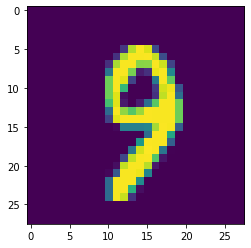

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))    # to shape (1, 28, 28) -> (28, 28)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [38]:
class NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(28*28, 64)
    self.l2 = nn.Linear(64, 64)
    self.l3 = nn.Linear(64, 64)
    self.l4 = nn.Linear(64, 10)

  def forward(self, input):
    input = F.relu(self.l1(input))
    input = F.relu(self.l2(input))
    input = F.relu(self.l3(input))
    input = self.l4(input)
    return F.log_softmax(input, dim=1 )

net = NN()
print(net)

NN(
  (l1): Linear(in_features=784, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=64, bias=True)
  (l3): Linear(in_features=64, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
x = torch.rand((28, 28))

In [0]:
x = x.view(-1, 28*28)  # -1, i.e. it would be unknown shape
out = net.forward(x)

In [41]:
out


tensor([[-2.2290, -2.3331, -2.2219, -2.2432, -2.3665, -2.3951, -2.2612, -2.4069,
         -2.1860, -2.4170]], grad_fn=<LogSoftmaxBackward>)

In [0]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [43]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [0]:
EPOCHS = 3 # count of iterations on the whole db

In [46]:
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad() # reset all loss gradients
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) # for one hot use MSE
    loss.backward() # backward prop
    optimizer.step() #adjust weights for us
  print(loss)

tensor(0.0023, grad_fn=<NllLossBackward>)
tensor(0.0091, grad_fn=<NllLossBackward>)
tensor(0.0230, grad_fn=<NllLossBackward>)


In [49]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    output = net(x.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) != y[idx]:
        correct +=1 
      total +=1
print("Accuracy: ", round(correct/total, 3))


Accuracy:  1.0


In [0]:
X


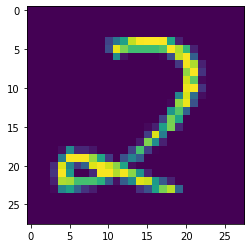

In [55]:
plt.imshow(X[1].view((28, 28)))

In [57]:
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))

tensor(2)
